In [3]:
import pandas as pd
import numpy as np

# Load the datasets
transaction_data = pd.read_excel('/content/QVI_transaction_data.xlsx')
purchase_behaviour = pd.read_csv('/content/QVI_purchase_behaviour.csv')

print("Transaction Data Head:")
transaction_data.head()
print("\nPurchase Behaviour Head:")
purchase_behaviour.head()

Transaction Data Head:

Purchase Behaviour Head:


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [6]:
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [7]:
transaction_data_df = transaction_data.to_csv('transaction_data.csv')

In [19]:
transaction_data = pd.read_csv('/content/transaction_data.csv')

In [20]:
transaction_data.head()

,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [21]:
transaction_data.isnull().sum()

,0
Unnamed: 0,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


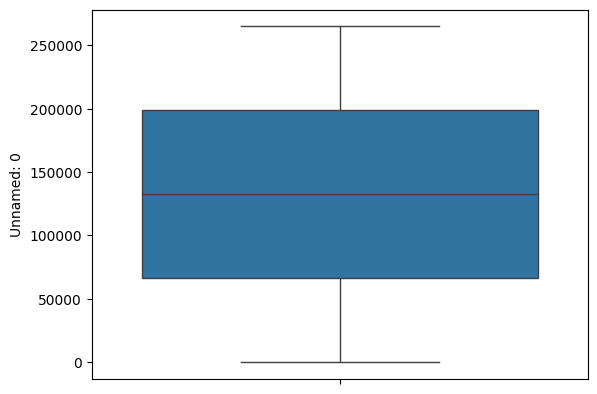

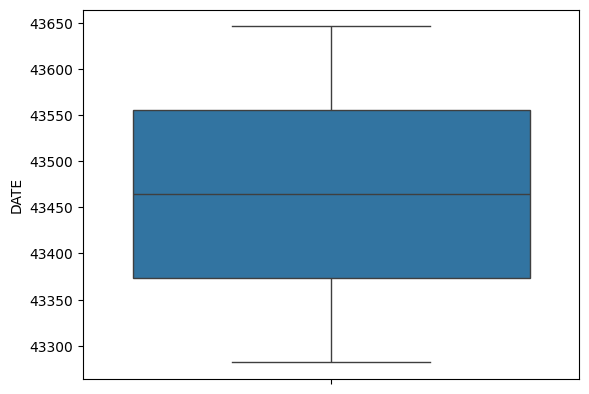

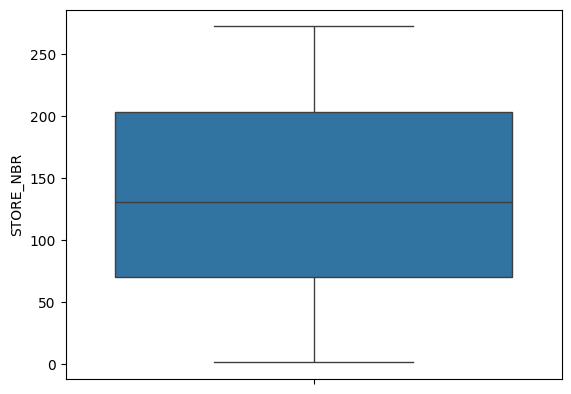

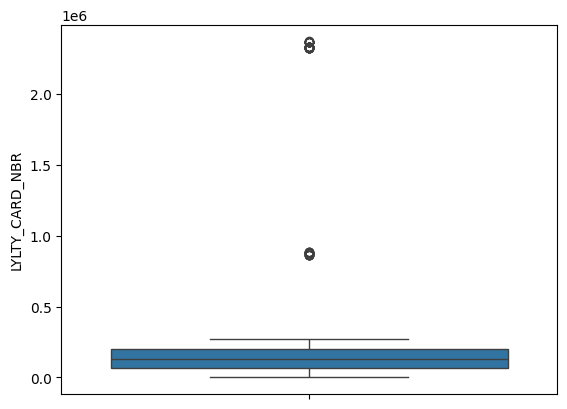

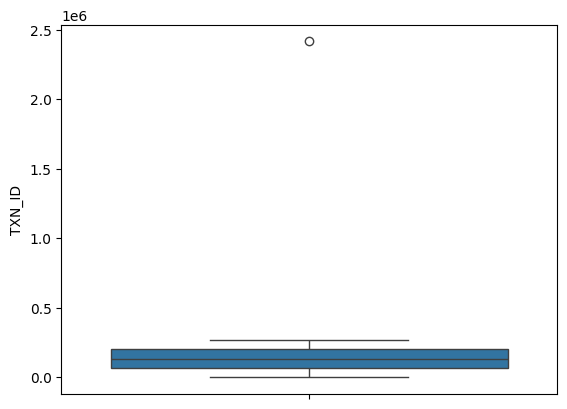

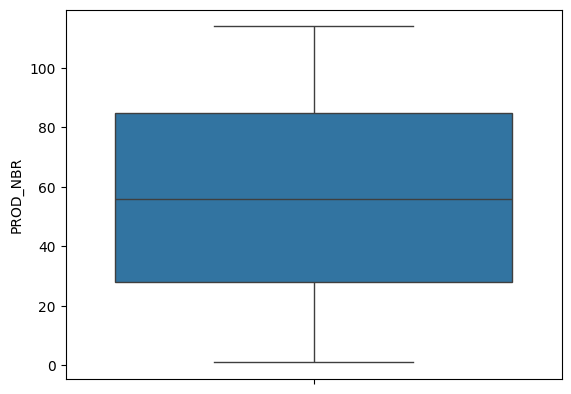

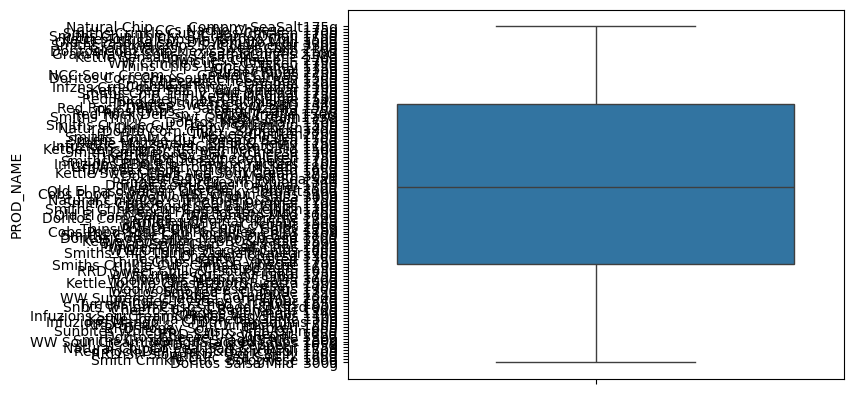

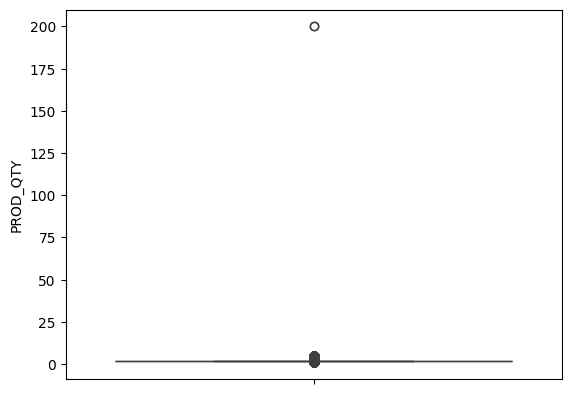

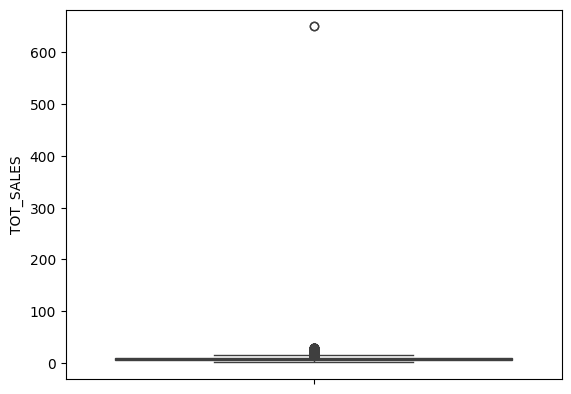

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in transaction_data.columns:
  sns.boxplot(transaction_data[i])
  plt.show()

In [24]:
for i in transaction_data.select_dtypes(include=np.number).columns:
  q3 = transaction_data[i].quantile(0.75)
  q1 = transaction_data[i].quantile(0.25)
  iqr = q3 - q1
  upper_bound = q3 + 1.5 * iqr
  lower_bound = q1 - 1.5 * iqr

  # Cap values above the upper bound with the upper bound
  #transaction_data[col] = np.where(transaction_data[col] > upper_bound, upper_bound, transaction_data[col])
  # Cap values below the lower bound with the lower bound
  #transaction_data[col] = np.where(transaction_data[col] < lower_bound, lower_bound, transaction_data[col])

  # Cap the values in the current column 'i'
  transaction_data[i] = transaction_data[i].clip(lower=lower_bound, upper=upper_bound)

In [28]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      264836 non-null  int64         
 1   DATE            264836 non-null  datetime64[ns]
 2   STORE_NBR       264836 non-null  int64         
 3   LYLTY_CARD_NBR  264836 non-null  float64       
 4   TXN_ID          264836 non-null  float64       
 5   PROD_NBR        264836 non-null  int64         
 6   PROD_NAME       264836 non-null  object        
 7   PROD_QTY        264836 non-null  int64         
 8   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 18.2+ MB


In [27]:
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'])

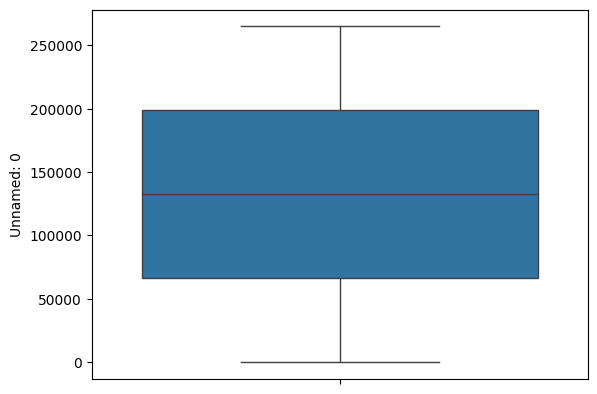

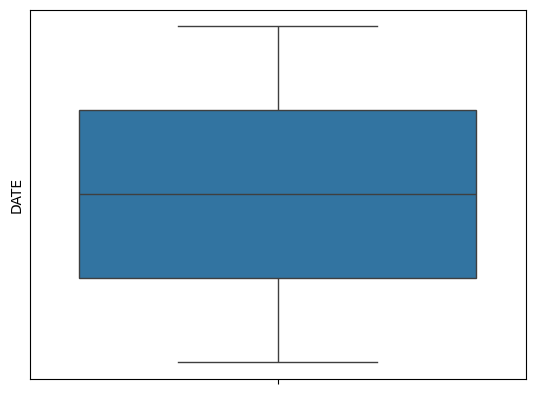

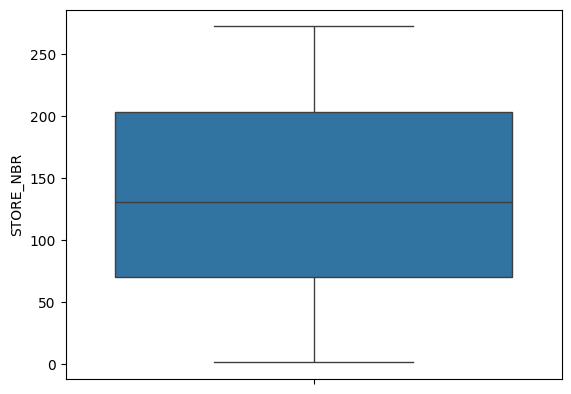

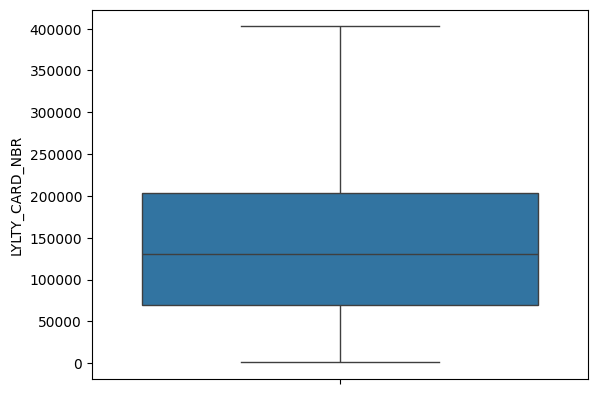

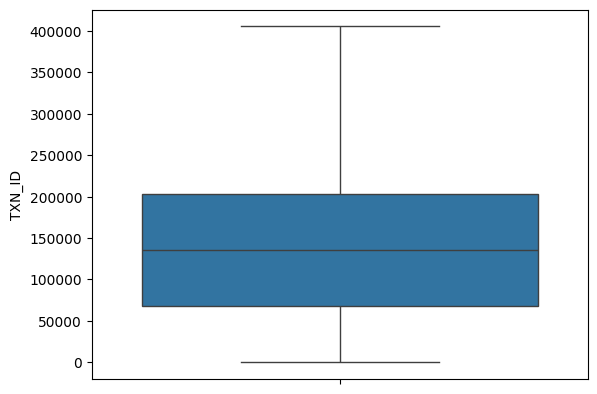

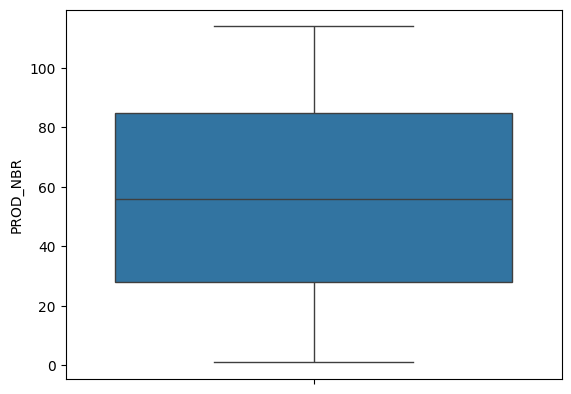

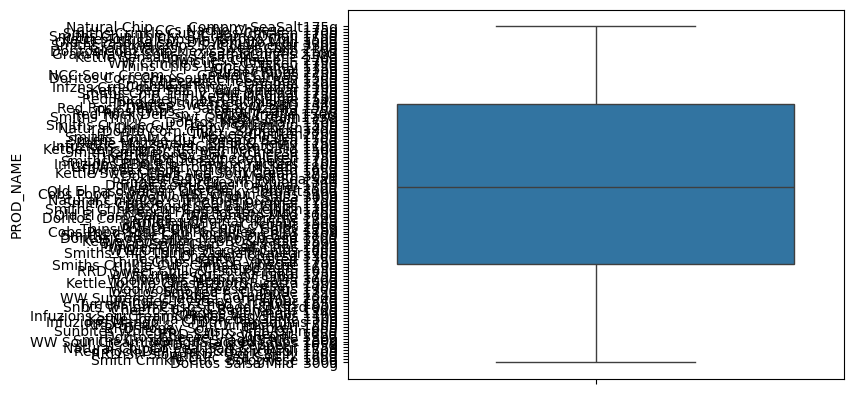

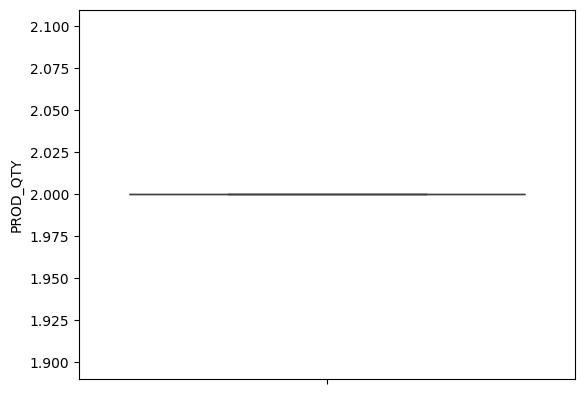

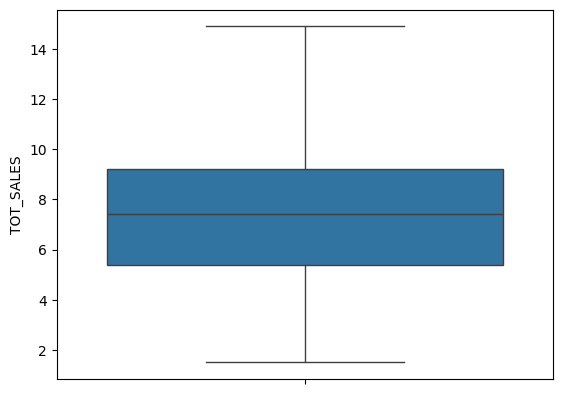

In [29]:
for i in transaction_data.columns:
  sns.boxplot(transaction_data[i])
  plt.show()

In [30]:
# Extract pack size by finding the number before 'g'
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract('(\d+)(?:g|G)')
transaction_data['PACK_SIZE'] = pd.to_numeric(transaction_data['PACK_SIZE'])

# Check unique pack sizes
print("\nUnique Pack Sizes:")
transaction_data['PACK_SIZE'].unique()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2574257086.py:2: SyntaxWarning: invalid escape sequence '\d'
  transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract('(\d+)(?:g|G)')



Unique Pack Sizes:


array([175, 170, 150, 300, 330, 210, 270, 220, 125, 110, 134, 380, 180,
       165, 135, 250, 200, 160, 190,  90,  70])

In [38]:
transaction_data.head()

,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,CMPY_NAME
0,0,1970-01-01 00:00:00.000043390,1,1000.0,1.0,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Compny SeaSalt
1,1,1970-01-01 00:00:00.000043599,1,1307.0,348.0,66,CCs Nacho Cheese 175g,2,6.3,175,CCs Nacho Cheese
2,2,1970-01-01 00:00:00.000043605,1,1343.0,383.0,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths Crinkle Cut Chips Chicken
3,3,1970-01-01 00:00:00.000043329,2,2373.0,974.0,69,Smiths Chip Thinly S/Cream&Onion 175g,2,14.9,175,Smiths Chip Thinly S/Cream&Onion
4,4,1970-01-01 00:00:00.000043330,2,2426.0,1038.0,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,13.8,150,Kettle Tortilla ChpsHny&Jlpno Chili


In [35]:
transaction_data['CMPY_NAME'] = transaction_data['PROD_NAME'].str.replace(r'\s*\d+[gG]\s*', '', regex=True).str.strip()

In [39]:
# Extract brand name (first word of PROD_NAME)
transaction_data['BRAND_NAME'] = transaction_data['PROD_NAME'].str.split().str[0]

# Standardize common brand names (e.g., 'RRD' is likely 'Red Rock Deli')
def clean_brand_name(brand):
    if brand in ['RRD', 'Red']: return 'Red Rock Deli'
    if brand in ['Doritos', 'Dorito']: return 'Doritos'
    if brand in ['Kettle', 'KT']: return 'Kettle'
    if brand in ['Infuzions', 'Infzns']: return 'Infuzions'
    if brand in ['Snbts']: return 'Sunbites'
    if brand in ['Tostitos']: return 'Tostitos'
    if brand in ['Woolworths']: return 'Woolworths'
    return brand

transaction_data['BRAND_NAME'] = transaction_data['BRAND_NAME'].apply(clean_brand_name)

print("\nTop 10 Brand Names (after cleaning):")
transaction_data['BRAND_NAME'].value_counts().head(10)


Top 10 Brand Names (after cleaning):


,count
BRAND_NAME,
Kettle,41288
Smiths,28860
Doritos,28147
Pringles,25102
Red Rock Deli,17779
Infuzions,14201
Thins,14075
WW,10320
Cobs,9693


In [40]:
# Merge the two DataFrames
merged_data = pd.merge(transaction_data, purchase_behaviour, on='LYLTY_CARD_NBR', how='left')

print("\nMerged Data Info:")
merged_data.info()


Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        264836 non-null  int64         
 1   DATE              264836 non-null  datetime64[ns]
 2   STORE_NBR         264836 non-null  int64         
 3   LYLTY_CARD_NBR    264836 non-null  float64       
 4   TXN_ID            264836 non-null  float64       
 5   PROD_NBR          264836 non-null  int64         
 6   PROD_NAME         264836 non-null  object        
 7   PROD_QTY          264836 non-null  int64         
 8   TOT_SALES         264836 non-null  float64       
 9   PACK_SIZE         264836 non-null  int64         
 10  CMPY_NAME         264836 non-null  object        
 11  BRAND_NAME        264836 non-null  object        
 12  LIFESTAGE         264792 non-null  object        
 13  PREMIUM_CUSTOMER  264792 non-null  objec

/tmp/ipython-input-1948651068.py:2: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_data = pd.merge(transaction_data, purchase_behaviour, on='LYLTY_CARD_NBR', how='left')


In [44]:
merged_data.head()

,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,CMPY_NAME,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER,AVG_PRICE_PER_UNIT
0,0,1970-01-01 00:00:00.000043390,1,1000.0,1.0,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Compny SeaSalt,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,1,1970-01-01 00:00:00.000043599,1,1307.0,348.0,66,CCs Nacho Cheese 175g,2,6.3,175,CCs Nacho Cheese,CCs,MIDAGE SINGLES/COUPLES,Budget,3.15
2,2,1970-01-01 00:00:00.000043605,1,1343.0,383.0,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths Crinkle Cut Chips Chicken,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
3,3,1970-01-01 00:00:00.000043329,2,2373.0,974.0,69,Smiths Chip Thinly S/Cream&Onion 175g,2,14.9,175,Smiths Chip Thinly S/Cream&Onion,Smiths,MIDAGE SINGLES/COUPLES,Budget,7.45
4,4,1970-01-01 00:00:00.000043330,2,2426.0,1038.0,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,13.8,150,Kettle Tortilla ChpsHny&Jlpno Chili,Kettle,MIDAGE SINGLES/COUPLES,Budget,6.90


In [43]:
merged_data['AVG_PRICE_PER_UNIT'] =  merged_data['TOT_SALES'] / merged_data['PROD_QTY']

In [46]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0          264836 non-null  int64         
 1   DATE                264836 non-null  datetime64[ns]
 2   STORE_NBR           264836 non-null  int64         
 3   LYLTY_CARD_NBR      264836 non-null  float64       
 4   TXN_ID              264836 non-null  float64       
 5   PROD_NBR            264836 non-null  int64         
 6   PROD_NAME           264836 non-null  object        
 7   PROD_QTY            264836 non-null  int64         
 8   TOT_SALES           264836 non-null  float64       
 9   PACK_SIZE           264836 non-null  int64         
 10  CMPY_NAME           264836 non-null  object        
 11  BRAND_NAME          264836 non-null  object        
 12  LIFESTAGE           264792 non-null  object        
 13  PREMIUM_CUSTOMER    264792 no

In [47]:
group_cols = ['LIFESTAGE', 'PREMIUM_CUSTOMER']

# Aggregate metrics by customer segment
customer_metrics = merged_data.groupby(group_cols).agg(
    Total_Sales=('TOT_SALES', 'sum'),
    Total_Transactions=('TXN_ID', 'count'),
    Number_of_Customers=('LYLTY_CARD_NBR', 'nunique'),
    Avg_Price_per_Unit=('AVG_PRICE_PER_UNIT', 'mean')
).reset_index()

In [48]:
customer_metrics

,LIFESTAGE,PREMIUM_CUSTOMER,Total_Sales,Total_Transactions,Number_of_Customers,Avg_Price_per_Unit
0,MIDAGE SINGLES/COUPLES,Budget,35470.80,5019,1503,3.533652
1,MIDAGE SINGLES/COUPLES,Mainstream,90627.10,11873,3339,3.816521
2,MIDAGE SINGLES/COUPLES,Premium,58338.25,8214,2430,3.551147
3,NEW FAMILIES,Budget,21906.95,3005,1112,3.645083
4,NEW FAMILIES,Mainstream,16999.95,2325,849,3.655903
5,NEW FAMILIES,Premium,11480.30,1589,588,3.612429
6,OLDER FAMILIES,Budget,167991.15,23153,4671,3.627848
7,OLDER FAMILIES,Mainstream,103264.80,14244,2831,3.624853
8,OLDER FAMILIES,Premium,80569.10,11192,2274,3.599406
9,OLDER SINGLES/COUPLES,Budget,136513.00,18402,4925,3.709189


In [49]:
# Calculate derived metrics
customer_metrics['Purchase_Frequency'] = customer_metrics['Total_Transactions'] / customer_metrics['Number_of_Customers']
customer_metrics['Avg_Spend_Per_Customer'] = customer_metrics['Total_Sales'] / customer_metrics['Number_of_Customers']

# Prepare final metrics table and save to CSV
final_metrics = customer_metrics[[
    'LIFESTAGE',
    'PREMIUM_CUSTOMER',
    'Number_of_Customers',
    'Total_Sales',
    'Avg_Spend_Per_Customer',
    'Purchase_Frequency',
    'Avg_Price_per_Unit'
]].sort_values(by='Total_Sales', ascending=False)

In [50]:
final_metrics

,LIFESTAGE,PREMIUM_CUSTOMER,Number_of_Customers,Total_Sales,Avg_Spend_Per_Customer,Purchase_Frequency,Avg_Price_per_Unit
6,OLDER FAMILIES,Budget,4671,167991.15,35.964708,4.956754,3.627848
19,YOUNG SINGLES/COUPLES,Mainstream,8084,157410.20,19.471821,2.579169,3.774825
13,RETIREES,Mainstream,6477,155510.35,24.009626,3.313880,3.622585
15,YOUNG FAMILIES,Budget,4015,139109.20,34.647372,4.761893,3.637983
9,OLDER SINGLES/COUPLES,Budget,4925,136513.00,27.718376,3.736447,3.709189
10,OLDER SINGLES/COUPLES,Mainstream,4927,133145.60,27.023666,3.716460,3.635673
11,OLDER SINGLES/COUPLES,Premium,4747,132011.25,27.809406,3.739414,3.718417
12,RETIREES,Budget,4450,112939.80,25.379730,3.415056,3.715858
7,OLDER FAMILIES,Mainstream,2831,103264.80,36.476439,5.031438,3.624853
14,RETIREES,Premium,3871,97484.40,25.183260,3.382847,3.722199


In [51]:
# Format for cleaner output
final_metrics_formatted = final_metrics.round({
    'Total_Sales': 2,
    'Avg_Spend_Per_Customer': 2,
    'Purchase_Frequency': 2,
    'Avg_Price_per_Unit': 2
})

In [52]:
# Save the final metrics table
final_metrics_formatted.to_csv('customer_segment_metrics.csv', index=False)
print("Metrics table saved as customer_segment_metrics.csv")

Metrics table saved as customer_segment_metrics.csv


In [53]:
# Create a combined segment label for plotting
metrics_df = final_metrics_formatted.copy()
metrics_df['Segment'] = metrics_df['LIFESTAGE'] + ' - ' + metrics_df['PREMIUM_CUSTOMER']
metrics_df_sorted = metrics_df.sort_values(by='Total_Sales', ascending=False)

/tmp/ipython-input-3757450403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Sales', y='Segment', data=metrics_df_sorted, palette='viridis')


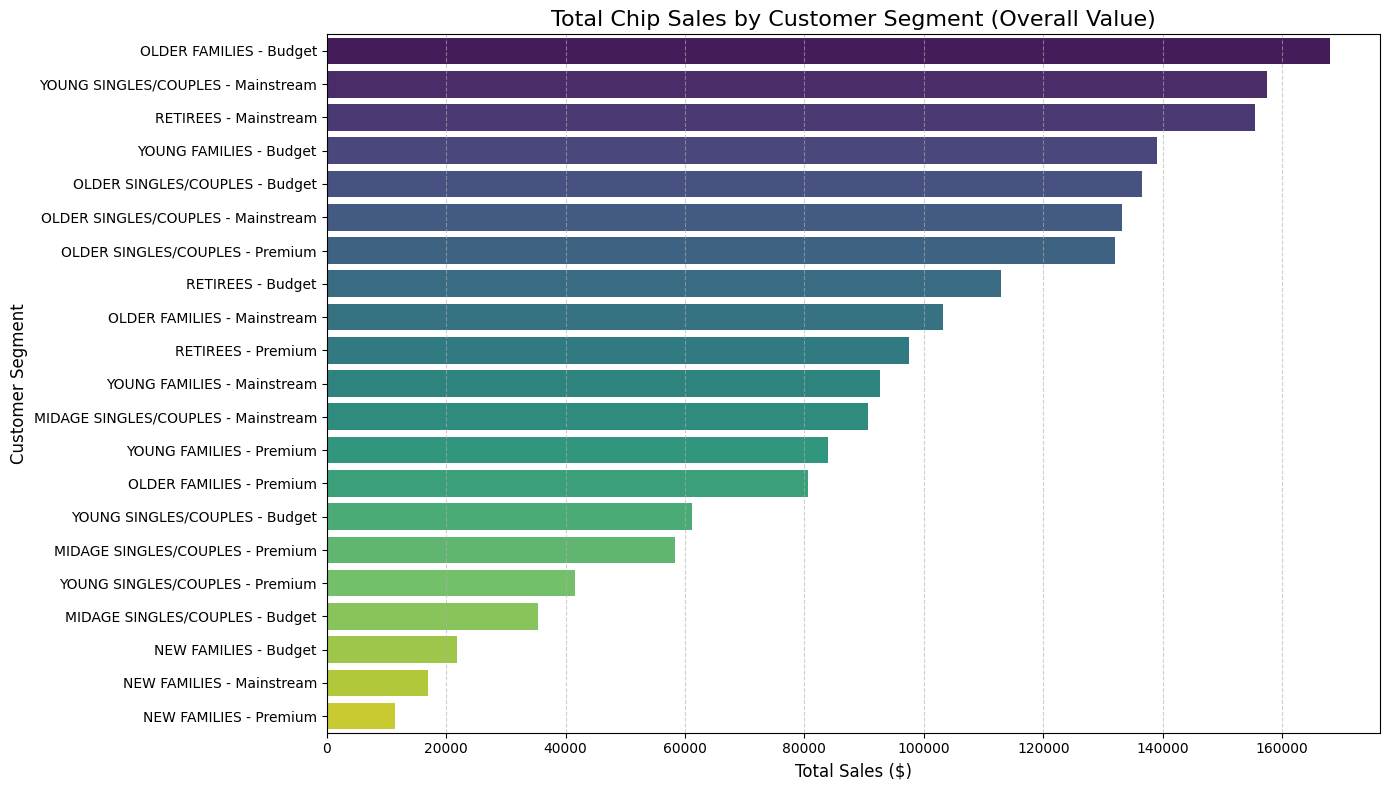

Visualization 1 saved as total_sales_by_segment.png


In [56]:
# Visualization 1: Total Sales by Segment
plt.figure(figsize=(14, 8))
sns.barplot(x='Total_Sales', y='Segment', data=metrics_df_sorted, palette='viridis')
plt.title('Total Chip Sales by Customer Segment (Overall Value)', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Customer Segment', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
plt.savefig('total_sales_by_segment.png')
plt.close()

print("Visualization 1 saved as total_sales_by_segment.png")

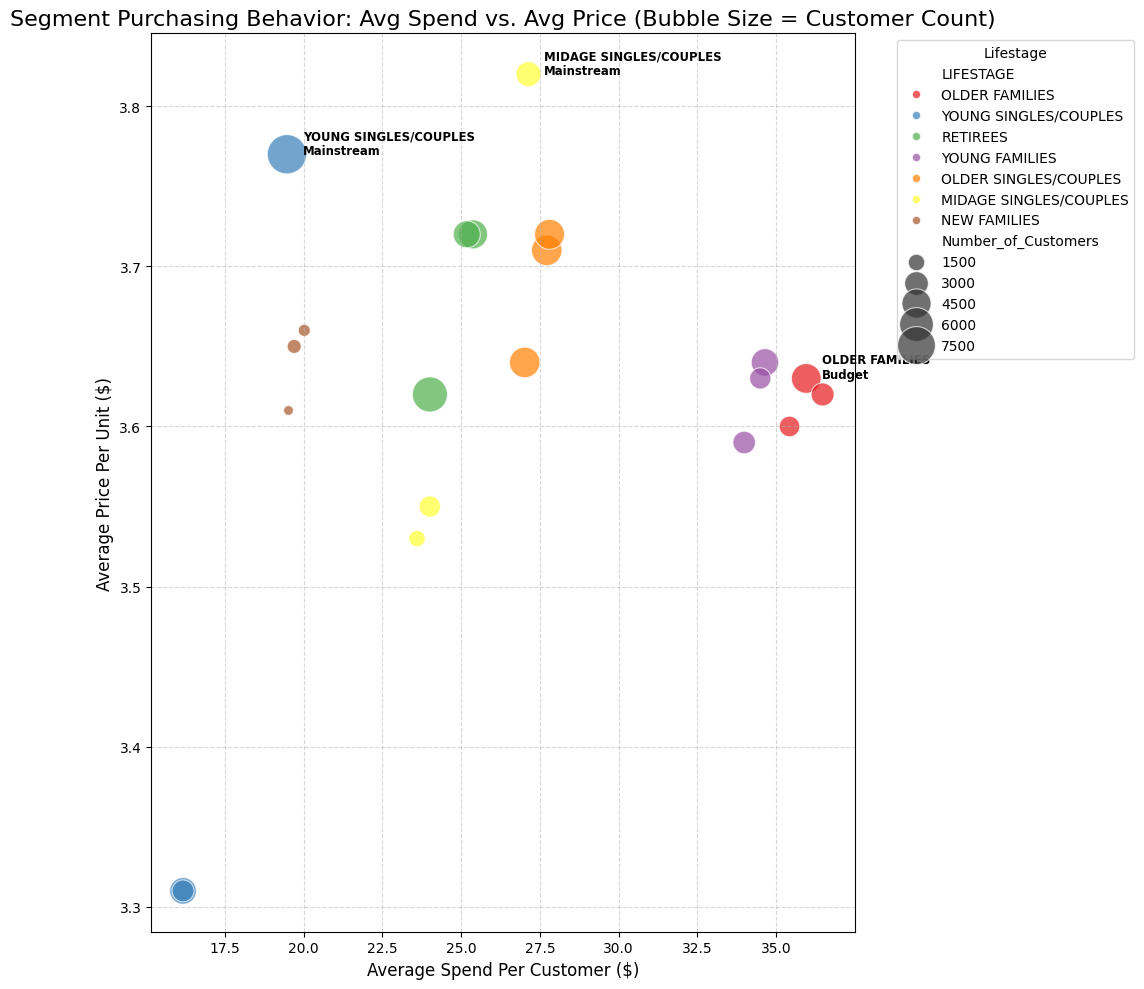

Visualization 2 saved as avg_spend_vs_avg_price.png

Analysis complete. Check your directory for the generated CSV and PNG files.


In [57]:
# Visualization 2: Avg Spend per Customer vs. Avg Price per Unit
plt.figure(figsize=(12, 10))
scatterplot = sns.scatterplot(
    x='Avg_Spend_Per_Customer',
    y='Avg_Price_per_Unit',
    hue='LIFESTAGE',
    size='Number_of_Customers',
    data=metrics_df,
    sizes=(50, 800),
    palette='Set1',
    alpha=0.7
)

# Label the points for key insights (top revenue drivers)
for line in range(0, metrics_df.shape[0]):
     if metrics_df.iloc[line]['Total_Sales'] >= metrics_df_sorted['Total_Sales'].iloc[1] or \
        metrics_df.iloc[line]['Avg_Price_per_Unit'] > 3.75:
        plt.text(
            metrics_df.iloc[line]['Avg_Spend_Per_Customer'] + 0.5,
            metrics_df.iloc[line]['Avg_Price_per_Unit'],
            metrics_df.iloc[line]['Segment'].replace(' - ', '\n'),
            horizontalalignment='left',
            size='small',
            color='black',
            weight='semibold'
        )

plt.title('Segment Purchasing Behavior: Avg Spend vs. Avg Price (Bubble Size = Customer Count)', fontsize=16)
plt.xlabel('Average Spend Per Customer ($)', fontsize=12)
plt.ylabel('Average Price Per Unit ($)', fontsize=12)
plt.legend(title='Lifestage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()
plt.savefig('avg_spend_vs_avg_price.png')
plt.close()
print("Visualization 2 saved as avg_spend_vs_avg_price.png")

print("\nAnalysis complete. Check your directory for the generated CSV and PNG files.")

# Insight

The customer segmentation analysis reveals several key insights into purchasing behaviors across different lifestage and premium customer groups:

**Top Performing Segments (by Total Sales):**
The highest revenue-generating segments are:
*   **Older Families - Budget**: This group leads in total sales ($167,991.15), demonstrating strong purchasing power and frequency.
*   **Young Singles/Couples - Mainstream**: A significant contributor to overall sales ($157,410.20), indicating a large customer base with regular purchases.
*   **Retirees - Mainstream**: Another high-volume segment ($155,510.35), highlighting the importance of retired customers to the business.

**High-Value Customer Behavior:**
*   **Older Families (Mainstream and Budget)** consistently show both high average spend per customer ($36.48 and $35.96 respectively) and high purchase frequency (5.03 and 4.96 respectively). These customers are highly engaged and loyal, making them critical for sustained revenue.
*   **Young Families (Budget and Premium)** also exhibit strong average spend ($34.65 and $34.50 respectively) and purchase frequency (4.76 and 4.75 respectively), suggesting they are valuable segments to nurture.

**Price Sensitivity and Premium Preferences:**
*   **Midage Singles/Couples - Mainstream** and **Young Singles/Couples - Mainstream** show a higher average price per unit ($3.82 and $3.77 respectively), indicating a preference for more premium or larger-pack products within their respective categories. This contrasts with "Young Singles/Couples - Budget" and "Premium" who have the lowest average prices per unit ($3.31 and $3.31 respectively). This suggests that the 'Mainstream' segment within Young Singles/Couples might be more willing to spend on higher-value chip products.
*   While "Young Singles/Couples - Mainstream" has high total sales and a good average price per unit, "Young Singles/Couples - Budget" and "Premium" have significantly lower average prices, indicating a possible opportunity to upsell or understand differing product preferences within this lifestage.

**Underperforming Segments & Opportunities:**
*   **New Families** across all premium customer types (Budget, Mainstream, Premium) represent the lowest-performing segments in terms of total sales, average spend per customer, and purchase frequency. This group could be a focus for targeted marketing campaigns to increase engagement and basket size, possibly with family-sized products or introductory offers.

**Strategic Recommendations:**
*   **Focus on Retention and Loyalty Programs** for "Older Families" and "Retirees" to maintain their high engagement and spend.
*   **Investigate and Promote Higher-Value Products** to "Mainstream Midage Singles/Couples" and "Mainstream Young Singles/Couples" to capitalize on their willingness to purchase higher-priced items.
*   **Develop Tailored Campaigns** for "New Families" to address their lower engagement and encourage increased purchasing. This could involve understanding their specific needs and offering relevant promotions or product bundles.

In [58]:
final_metrics_formatted

,LIFESTAGE,PREMIUM_CUSTOMER,Number_of_Customers,Total_Sales,Avg_Spend_Per_Customer,Purchase_Frequency,Avg_Price_per_Unit
6,OLDER FAMILIES,Budget,4671,167991.15,35.96,4.96,3.63
19,YOUNG SINGLES/COUPLES,Mainstream,8084,157410.20,19.47,2.58,3.77
13,RETIREES,Mainstream,6477,155510.35,24.01,3.31,3.62
15,YOUNG FAMILIES,Budget,4015,139109.20,34.65,4.76,3.64
9,OLDER SINGLES/COUPLES,Budget,4925,136513.00,27.72,3.74,3.71
10,OLDER SINGLES/COUPLES,Mainstream,4927,133145.60,27.02,3.72,3.64
11,OLDER SINGLES/COUPLES,Premium,4747,132011.25,27.81,3.74,3.72
12,RETIREES,Budget,4450,112939.80,25.38,3.42,3.72
7,OLDER FAMILIES,Mainstream,2831,103264.80,36.48,5.03,3.62
14,RETIREES,Premium,3871,97484.40,25.18,3.38,3.72


## Customer Segmentation Analysis: Key Insights

The customer segmentation analysis reveals several key insights into purchasing behaviors across different lifestage and premium customer groups:

### Top Performing Segments (by Total Sales):
The highest revenue-generating segments are:
*   **Older Families - Budget**: This group leads in total sales ($167,991.15), demonstrating strong purchasing power and frequency.
*   **Young Singles/Couples - Mainstream**: A significant contributor to overall sales ($157,410.20), indicating a large customer base with regular purchases.
*   **Retirees - Mainstream**: Another high-volume segment ($155,510.35), highlighting the importance of retired customers to the business.

### High-Value Customer Behavior:
*   **Older Families (Mainstream and Budget)** consistently show both high average spend per customer ($36.48 and $35.96 respectively) and high purchase frequency (5.03 and 4.96 respectively). These customers are highly engaged and loyal, making them critical for sustained revenue.
*   **Young Families (Budget and Premium)** also exhibit strong average spend ($34.65 and $34.50 respectively) and purchase frequency (4.76 and 4.75 respectively), suggesting they are valuable segments to nurture.

### Price Sensitivity and Premium Preferences:
*   **Midage Singles/Couples - Mainstream** and **Young Singles/Couples - Mainstream** show a higher average price per unit ($3.82 and $3.77 respectively), indicating a preference for more premium or larger-pack products within their respective categories. This contrasts with "Young Singles/Couples - Budget" and "Premium" who have the lowest average prices per unit ($3.31 and $3.31 respectively). This suggests that the 'Mainstream' segment within Young Singles/Couples might be more willing to spend on higher-value chip products.
*   While "Young Singles/Couples - Mainstream" has high total sales and a good average price per unit, "Young Singles/Couples - Budget" and "Premium" have significantly lower average prices, indicating a possible opportunity to upsell or understand differing product preferences within this lifestage.

### Underperforming Segments & Opportunities:
*   **New Families** across all premium customer types (Budget, Mainstream, Premium) represent the lowest-performing segments in terms of total sales, average spend per customer, and purchase frequency. This group could be a focus for targeted marketing campaigns to increase engagement and basket size, possibly with family-sized products or introductory offers.

### Strategic Recommendations:
*   **Focus on Retention and Loyalty Programs** for "Older Families" and "Retirees" to maintain their high engagement and spend.
*   **Investigate and Promote Higher-Value Products** to "Mainstream Midage Singles/Couples" and "Mainstream Young Singles/Couples" to capitalize on their willingness to purchase higher-priced items.
*   **Develop Tailored Campaigns** for "New Families" to address their lower engagement and encourage increased purchasing. This could involve understanding their specific needs and offering relevant promotions or product bundles.

## Summary:

### Data Analysis Key Findings
*   **Top-Performing Segments by Total Sales:**
    *   "Older Families - Budget" leads with \$167,991.15 in total sales, an average spend of \$35.96 per customer, and a purchase frequency of 4.96.
    *   "Young Singles/Couples - Mainstream" is a significant contributor with \$157,410.20 in total sales.
    *   "Retirees - Mainstream" follows with \$155,510.35 in total sales.
*   **High-Value Customer Behavior:**
    *   "Older Families" (Mainstream and Budget) consistently show high average spend per customer (\$36.48 and \$35.96 respectively) and high purchase frequency (5.03 and 4.96 respectively).
    *   "Young Families" (Budget and Premium) also exhibit strong average spend (\$34.65 and \$34.50 respectively) and purchase frequency (4.76 and 4.75 respectively).
*   **Price Sensitivity and Premium Preferences:**
    *   "Midage Singles/Couples - Mainstream" and "Young Singles/Couples - Mainstream" show a higher average price per unit (\$3.82 and \$3.77 respectively), indicating a preference for more premium products.
    *   In contrast, "Young Singles/Couples - Budget" and "Premium" have the lowest average prices per unit (\$3.31 each), suggesting price sensitivity.
*   **Underperforming Segments:**
    *   "New Families" across all premium types (Budget, Mainstream, Premium) represent the lowest-performing segments in terms of total sales (\$21,906.95, \$16,999.95, \$11,480.30 respectively), average spend, and purchase frequency.

### Insights or Next Steps
*   **Strategic Recommendations:** Focus on retention and loyalty programs for "Older Families" and "Retirees" due to their high engagement and spend.
*   **Product Promotion:** Investigate and promote higher-value products to "Mainstream Midage Singles/Couples" and "Mainstream Young Singles/Couples" to capitalize on their willingness to purchase higher-priced items.
*   **Targeted Campaigns:** Develop tailored marketing campaigns for "New Families" to address their lower engagement and encourage increased purchasing, potentially with family-sized products or introductory offers.
